<a href="https://colab.research.google.com/github/zicarelli/cs480student/blob/main/07/CS480_Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

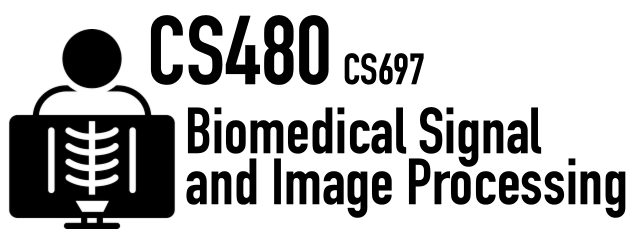
#Assignment 7

In [ ]:
# In this assignment, we will explore the Imaging Data Commons,
# a new service from the National Cancer Institute.
#
# We will find and explore a PET dataset and then perform a MIP reconstruction.

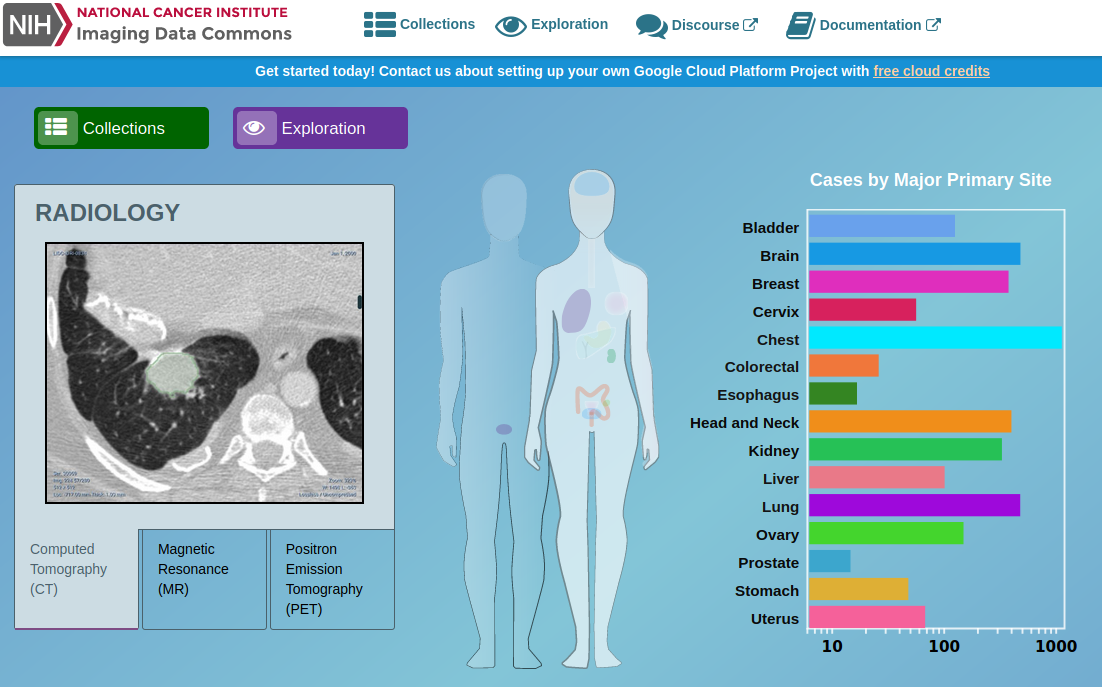

**Task 1**: Browse the IDC datasets and find a combined CT or MRI with PET! [15 Points]

In [ ]:
#
# Visit https://portal.imaging.datacommons.cancer.gov/ and find a dataset
# that includes structural imaging such as CT or MRI combined with a PET scan.
#
# You can start by selecting the type of a cancer case such as Bladder, Brain etc.
# Hint: Head and Neck include many PET scans.
#

In [ ]:
# Open the integrated OHIF viewer to view the data.
#
# 1) Select a collection, then a case, then a study in the IDC interface.
# 2) To open the OHIF viewer, click on the view icon.
# 3) Paste a screenshot of the viewer after the data was loaded below.
#

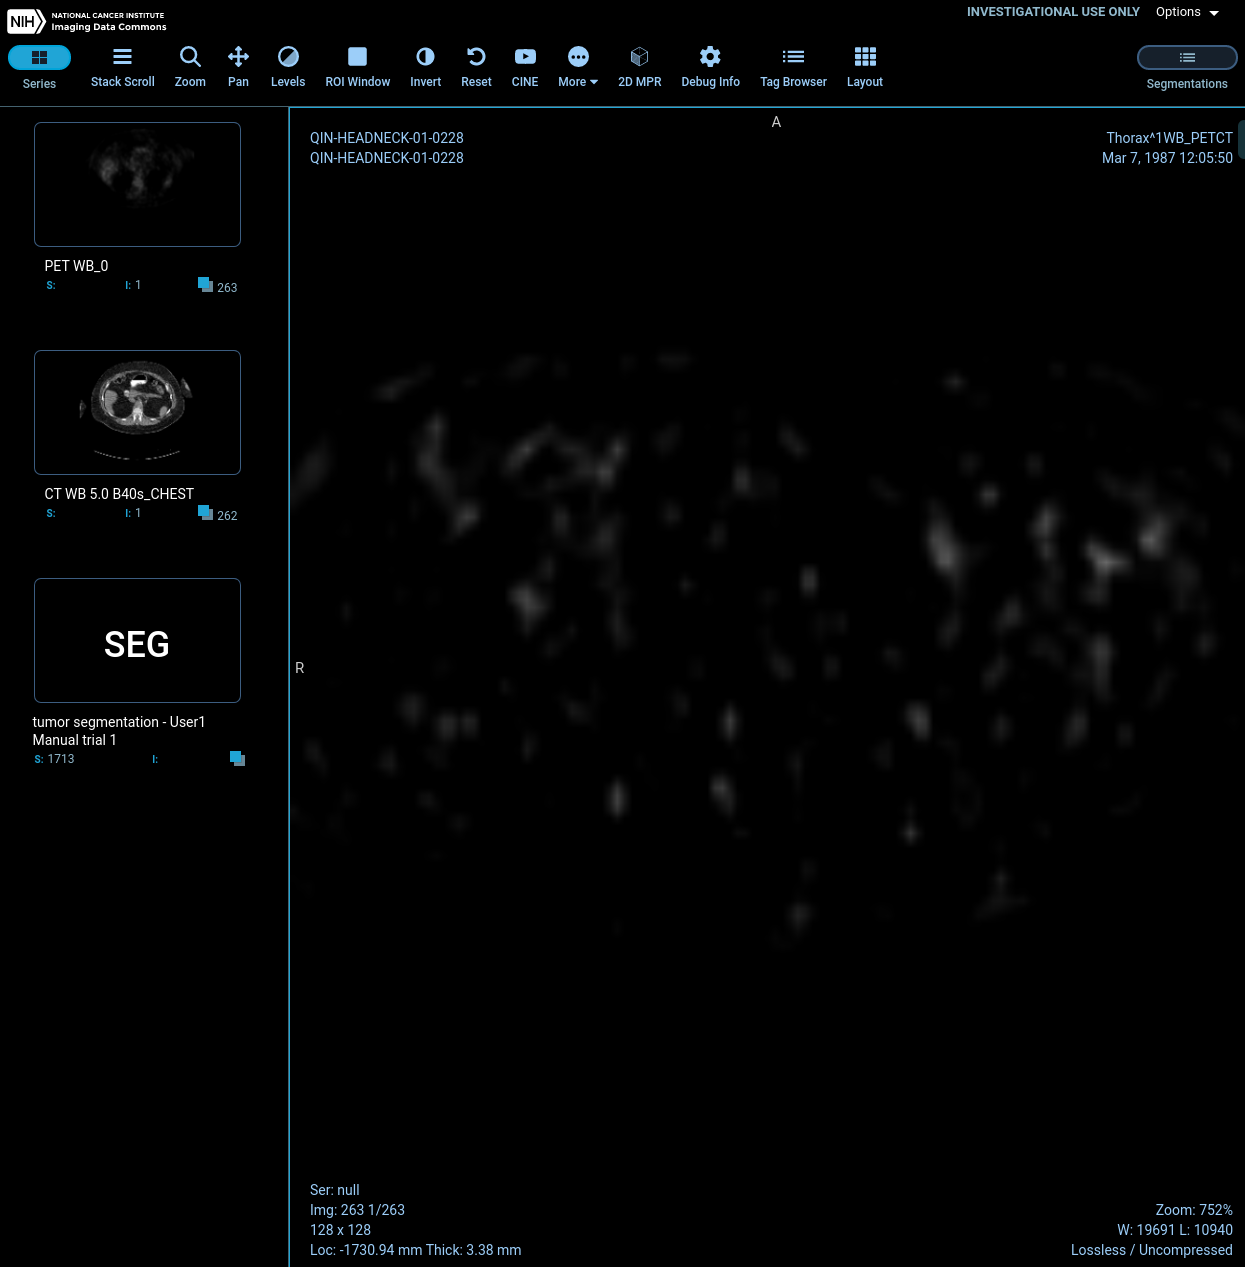

**Task 2**: Visualize structural and PET side-by-side! [30 Points]

In [ ]:
# In the OHIF viewer, please change the layout to show the structural image
# next to the PET scan.
#
# Use the LAYOUT functionality in the toolbar to switch to a 2-column layout.

In [ ]:
# Find the cancerous lesion.
#
# 1) Navigate through the PET image to find the cancerous lesion.

In [ ]:
# Sync the structural scan (CT or MR) to the PET scan with the lesion.
#
# Hint: The "Loc" label in the bottom left of both scans should roughly match.
# Hint 2: The Levels tool allows Window/Level adjustment to increase contrast.
#

In [ ]:
# Paste a screenshot showing the 2-column layout below.

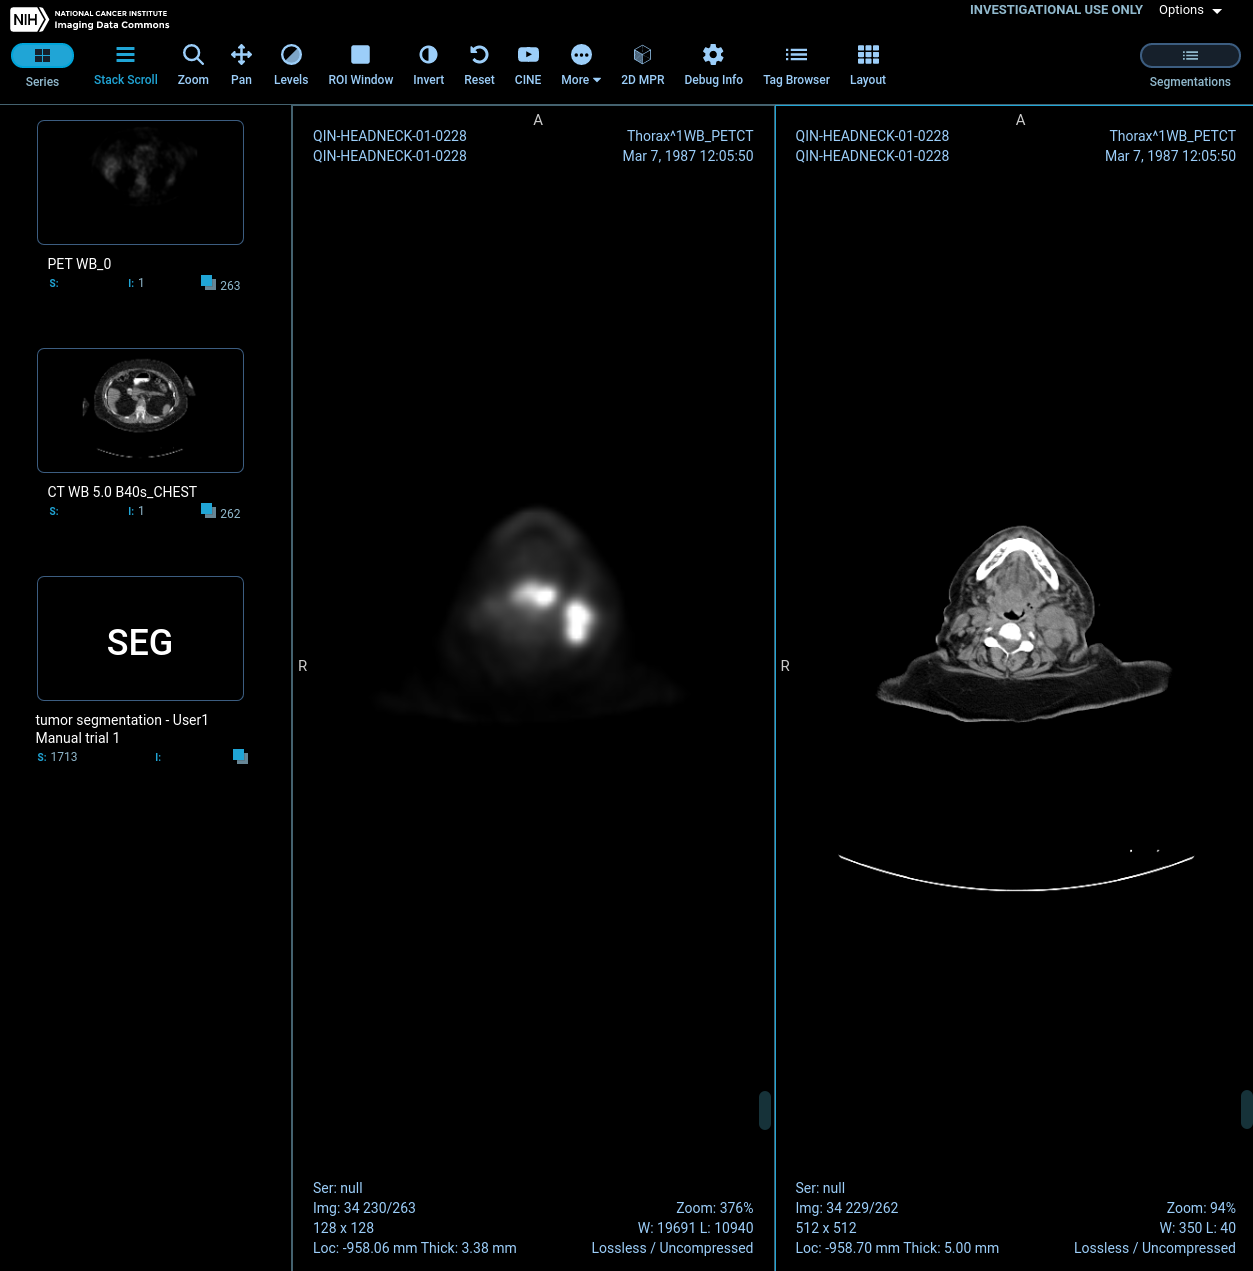

**Task 3**: Use an MIP to reslice the PET scan! [35 Points]

In [ ]:
# We will now use the 2D MPR functionality to look at the lesion from different
# orientations.
#
# Hint: This works best in Google Chrome.

In [ ]:
# Question 1): What is MPR?

# MPR is multiplanar reconstruction, which is a projection of imaging data
# from one plane to another.  In our case, the slice shown by the IDC is along
# the transverse plane, so a MPR is a data transform that would yield a sagittal
# or coronal aligned image.

# Source:
# https://en.wikipedia.org/wiki/CT_scan#Multiplanar_reconstruction

In [ ]:
# Question 2): What is the difference between MIP, MinIP, AvgIP?

# MIP, MinIP, and AvgIP are different algorithms for calculating voxel values in
# MPR projections.  When using MPR, data will be pulled from multiple image
# slices along the image stack.  When tracing a ray through this stack
# intersects multiple images, an algorithm is needed to determine to take the
# multiple input Hounsfield values and output one Hounsfield value for the newly
# projected orthagonal image.

# MIP stands for maximum intensity projection.  This algorithm takes the maximum
# Hounsfield value of the inputs to be the output value.

# MinIP stands for minimum intensity projection, and is similar to MIP, but
# results in the minimum value rather than the maximum.

# AvgIP stands for average intensity projection.  It outputs the average of the
# input axis of Hounsfield values for each new pixel.

In [ ]:
# Now, please navigate to the lesion in all 3 orientations.

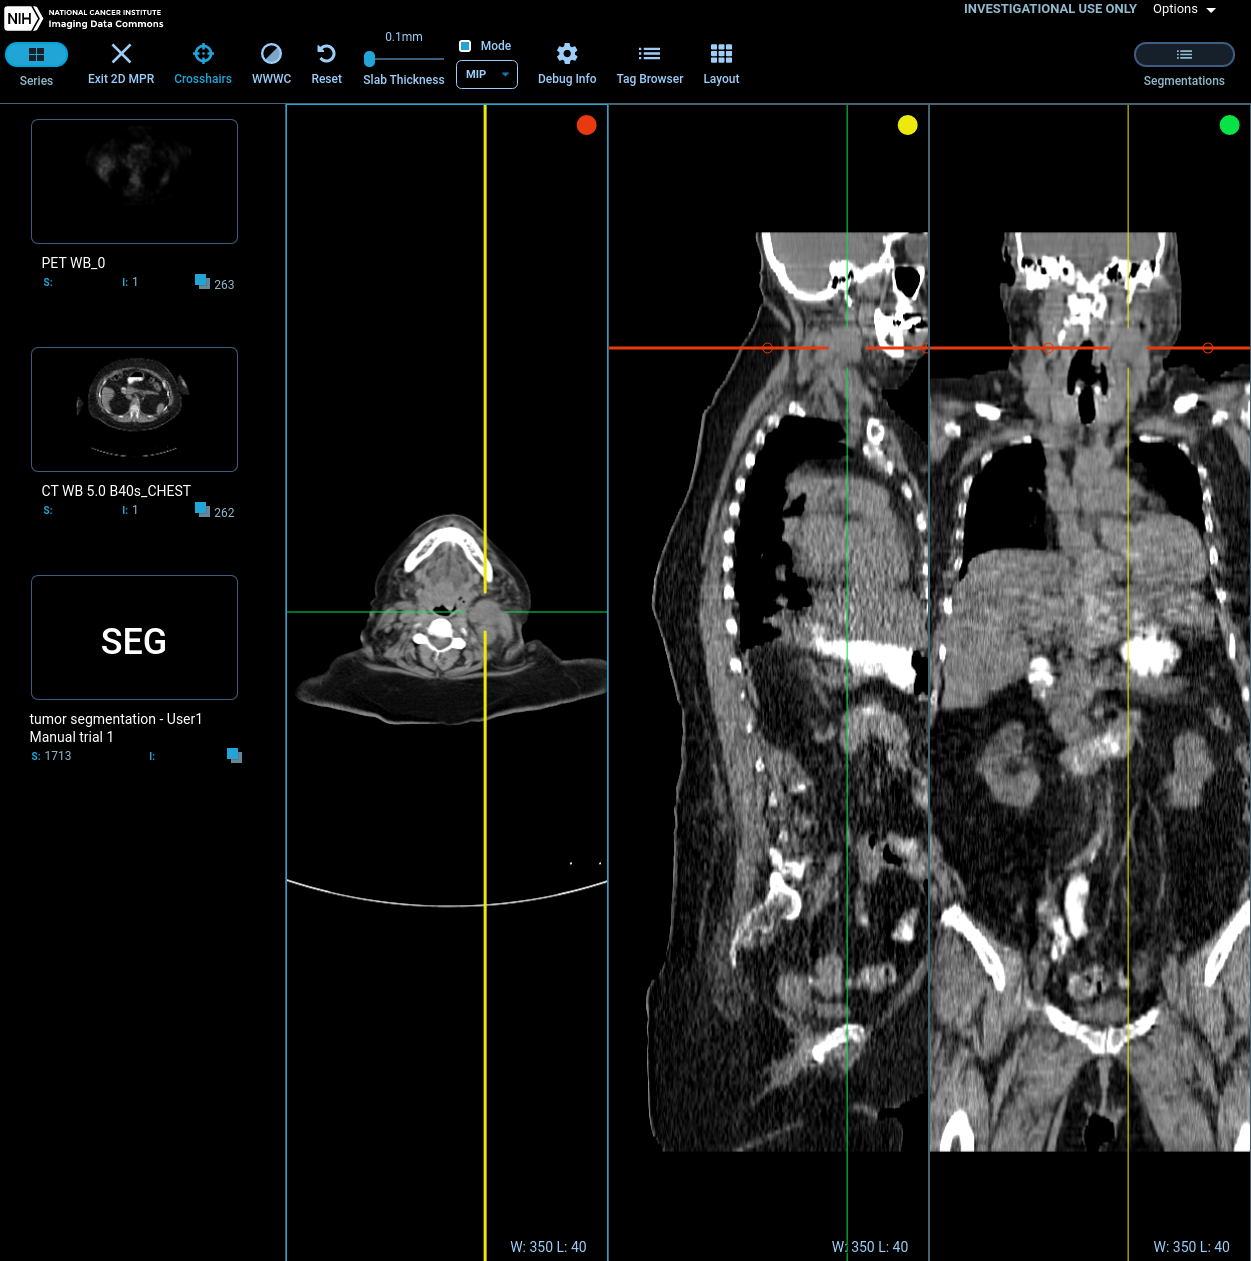

In [ ]:
# Question 3): What does the Slab Thickness slider do?

# The Slab Thinkness slider changes the voxel size used in the calculations of
# the MPR images.  Thicker slabs result in more input data for the given voxel:
# this is where the above algorithms (MIP, MinIP, AvgIP) come into play to
# reduce these multiple values into one.

# This can be seen in action with the IDC viewer!  By default, Slab Thickness is
# set to 0.1mm, the smallest available value.  As there seem to be at most one
# value in each voxel of this size, the selection of MIP / MinIP / AvgIP has no
# effect.  However, increasing the Slab Thinkness results in larger voxels: now
# the Mode selection is useful!  I found it interesting to play around with
# these features.

**Task 4**: Let's access the pixel data! [20 Points]

In [ ]:
# Please EXIT THE 2D MPR.
#
# We will now grab the pixel data of the currently displayed slice
# using the Javascript console.
#

In [ ]:
# 1) Open the Developer Tools of your browser and access the JS console.
#

# Done.

In [ ]:
# 2) The following code allows to access the pixel data of the slice that
# is currently displayed.
#
# element = cornerstone.getEnabledElements()[0];
# pixels = element.image.getPixelData();
#

# Cool, this seems to work!

In [1]:
# Question 4): What is the maximum pixel value of the current slice?
#
# Hint: There are multiple ways of doing this according to
# https://medium.com/coding-at-dawn/the-fastest-way-to-find-minimum-and-maximum-values-in-an-array-in-javascript-2511115f8621

# I first tried:
#
# Math.max(...pixels);
#
# However, this failed due to a RangeError: Maximum call stack size exceeded.
# So the pixels arrray is too big to use the spread operator.
#
# I then tried using reduce with a function that selects the maximum of two
# values being compared.  This worked!  The code I used and the resulting value:
#
# pixels.reduce(function(a, b) {
#     return Math.max(a, b);
# });
# 2638
#
# So the maximum pixel value of the current slice is 2638.

**Bonus**: Apply a filter mask to the current slice! [33 Points]


In [ ]:
# Here we will modify the pixel data!
#
# The following code allows you to set the pixels of the current slice.
#
#   pixels.set(new_pixels);
#
# Write code to APPLY A FILTER MASK to the pixels.
#
# Hint: You can use the following code to get the dimensions of the current slice.
#   w = element.image.width;
#   h = element.image.height;
#
# You can decide which filter mask to apply (e.g., Gaussian blur, edge detection..).
#
# ** IMPORTANT **
# Hint 2: Triggering a REDRAW programmatically might be hard but you can use
# the LEVELS tool to manually trigger a redraw to see filtered pixels.
# ** IMPORTANT **

In [ ]:
#
#
# TODO: YOUR CODE GOES HERE
#
#

In [ ]:
# TODO: Please add a screenshot after filtering the current slice.

TODO: ADD SCREENSHOT

In [ ]:
#
# SUPER BONUS (+33 extra): Can you trigger the redraw programmatically?
#

In [ ]:
# TODO: YOUR CODE FOR REDRAW GOES HERE

In [ ]:
#
# THANK YOU!!!
#
#       .--..--..--..--..--..--.
#     .' \  (`._   (_)     _   \
#   .'    |  '._)         (_)  |
#   \ _.')\      .----..---.   /
#   |(_.'  |    /    .-\-.  \  |
#   \     0|    |   ( O| O) | o|
#    |  _  |  .--.____.'._.-.  |
#    \ (_) | o         -` .-`  |
#     |    \   |`-._ _ _ _ _\ /
#     \    |   |  `. |_||_|   |
#     | o  |    \_      \     |     -.   .-.
#     |.-.  \     `--..-'   O |     `.`-' .'
#   _.'  .' |     `-.-'      /-.__   ' .-'
# .' `-.` '.|='=.='=.='=.='=|._/_ `-'.'
# `-._  `.  |________/\_____|    `-.'
#    .'   ).| '=' '='\/ '=' |
#    `._.`  '---------------'
#            //___\   //___\
#              ||       ||
#     LGB      ||_.-.   ||_.-.
#             (_.--__) (_.--__)
#
#